# Análisis espectral de señales deterministas

* Este cuaderno jupyter es parte de una [colección de cuadernos] (../ index.ipynb) sobre varios temas del procesamiento de señal digital. Dirija sus preguntas y sugerencias a [Sascha.Spors@uni-rostock.de] (mailto: Sascha.Spors@uni-rostock.de). *

## Introducción

El análisis de las propiedades espectrales de una señal juega un papel importante en el procesamiento de la señal digital. Algunos ejemplos de aplicación son los

* [Analizador de espectro] (https://en.wikipedia.org/wiki/Spectrum_analyzer)
* Detección de señales (armónicas)
* [Estimación de frecuencia fundamental y armónicos] (https://en.wikipedia.org/wiki/Modal_analysis)
* Supresión espectral: supresión de eco acústico, reducción de ruido, ...

En la realización práctica de las técnicas de análisis espectral, la [transformada discreta de Fourier] (https://en.wikipedia.org/wiki/Discrete_Fourier_transform) (DFT) se aplica a señales discretas de longitud finita para obtener información sobre su composición espectral . Una tarea básica en el análisis espectral es determinar la amplitud (y fase) de las contribuciones armónicas dominantes en una mezcla de señales. Las propiedades de la DFT con respecto al análisis de una señal exponencial armónica se analizan a continuación.

## El efecto de fuga

[Fuga espectral] (https://en.wikipedia.org/wiki/Spectral_leakage) es un efecto fundamental de la DFT. Limita la capacidad de detectar señales armónicas en mezclas de señales y, por lo tanto, el rendimiento del análisis espectral. Para discutir este efecto, el DFT de una señal exponencial discreta se revisa a partir de la transformada de Fourier de la señal exponencial continua. A continuación se ilustran las conexiones entre la transformada de Fourier, la [transformada de Fourier de tiempo discreto] (https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform) (DTFT) y la DFT para una señal muestreada de manera uniforme.

![Connections between the different Fourier transforms](Fourier_transforms.png)

354/5000
En consecuencia, el efecto de fuga se discute en el resto de esta sección al considerar los siguientes cuatro pasos:

1. Transformada de Fourier de una señal exponencial armónica,
2. Transformada de Fourier de tiempo discreto (DTFT) de una señal exponencial armónica discreta, y
3. DTFT de una señal exponencial armónica discreta de longitud finita
4. muestreo de la DTFT.

### Transformada de Fourier de una señal exponencial

La señal exponencial armónica se define como


\begin{equation}
x(t) = \mathrm{e}^{\,\mathrm{j}\, \omega_0 \, t}
\end{equation}

donde $ \ omega_0 = 2 \ pi f $ denota la frecuencia angular de la señal. La transformada de Fourier de la señal exponencial es

\begin{equation}
X(\mathrm{j}\, \omega) = \int\limits_{-\infty}^{\infty} x(t) \,\mathrm{e}^{\,- \mathrm{j}\, \omega \,t} \mathrm{d}t = 2\pi \; \delta(\omega - \omega_0)
\end{equation}
El espectro consiste en un solo impulso de Dirac desplazado ubicado en la frecuencia angular $ \ omega_0 $ de la señal exponencial. Por lo tanto, el espectro $ X (\ mathrm {j} \, \ omega) $ consiste en un evento claramente aislado y distinguible. En la práctica, no es posible calcular la transformada de Fourier de una señal continua por medio del procesamiento de señal digital

### Transformada de Fourier en tiempo discreto de una señal exponencial discreta

Ahora consideremos las señales muestreadas. La señal exponencial discreta $ x [k] $ se deriva de su contraparte continua $ x (t) $ anterior por muestreo equidistante $ x [k]: = x (k T) $ con el intervalo de muestreo $ T $


\begin{equation}
x[k] = \mathrm{e}^{\,\mathrm{j}\, \Omega_0 \,k}
\end{equation}

donde $ \ Omega_0 = \ omega_0 T $ denota la frecuencia angular normalizada. La DTFT es la transformada de Fourier de una señal muestreada. Para la señal exponencial se da como (ver, por ejemplo, [señales discretas de tarjeta de referencia y sistemas] (../ reference_cards / RC_discrete_signals_and_systems.pdf))

\begin{equation}
X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \sum_{k = -\infty}^{\infty} x[k]\, \mathrm{e}^{\,-\mathrm{j}\, \Omega \,k} = 2\pi \sum_{n = -\infty}^{\infty} \delta((\Omega-\Omega_0) - 2\,\pi\,n)
\end{equation}

El espectro del DTFT es $ 2 \ pi $ -periódico debido al muestreo. Como consecuencia, la transformación de la señal exponencial discreta consiste en una serie de impulsos de Dirac. Para la región de interés $ - \ pi <\ Omega \ leq \ pi $, el espectro consiste en un evento claramente aislado y distinguible, como en el caso continuo.

El DTFT no puede realizarse en la práctica, ya que requiere el conocimiento de la señal $ x [k] $ para todos los instantes de tiempo $ k $. En general, una señal medida solo se conoce dentro de un intervalo de tiempo finito. La DFT de una señal de longitud finita se puede derivar de la DTFT en dos pasos:

1. truncamiento (ventana) de la señal y
2. muestreo del espectro DTFT de la señal en ventana.

Las consecuencias de estos dos pasos se investigan a continuación.

### Transformada de Fourier en tiempo discreto de una señal exponencial discreta truncada

En general, el truncamiento de una señal $ x [k] $ a una longitud de $ N $ muestras se modela multiplicando la señal con una función de ventana $ w [k] $ de longitud $ N $
\begin{equation}
x_N[k] = x[k] \cdot w[k]
\end{equation}

215/5000
donde $ x_N [k] $ denota la señal truncada y $ w [k] = 0 $ para $ \ {k: k <0 \ wedge k \ geq N \} $. El espectro $ X_N (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $ puede derivarse del teorema de multiplicación del DTFT como
\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \frac{1}{2 \pi} X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \circledast_N W(\mathrm{e}^{\,\mathrm{j}\, \Omega})
\end{equation}

donde $ \ circledast_N $ denota la cíclica / [convolución circular] (https://en.wikipedia.org/wiki/Circular_convolution) de longitud $ N $. La señal rectangular modela un truncamiento duro de la señal a muestras de $ N $
\begin{equation}
w[k] = \text{rect}_N[k] = \begin{cases}
1 & \mathrm{for} \; 0\leq k<N \\
0 & \mathrm{otherwise}
\end{cases}
\end{equation}

Su espectro se da como

\begin{equation}
W(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \mathrm{e}^{\,-\mathrm{j} \, \Omega \,\frac{N-1}{2}} \cdot \frac{\sin(\frac{N \,\Omega}{2})}{\sin(\frac{\Omega}{2})}
\end{equation}

437/5000
El DTFT $ X_N (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $ de la señal exponencial truncada se deriva al introducir el DTFT de la señal exponencial y la función de ventana en la convolución cíclica anterior. Dado que tanto la DTFT de la señal exponencial como la función de ventana son periódicas con un período de $ 2 \ pi $, la convolución cíclica con el período $ 2 \ pi $ viene dada por la convolución lineal de ambos espectros dentro de $ - \ pi <\ Omega \ leq \ pi $

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \delta(\Omega-\Omega_0) * \mathrm{e}^{\,-\mathrm{j} \, \Omega \,\frac{N-1}{2}} \cdot \frac{\sin(\frac{N \,\Omega}{2})}{\sin(\frac{\Omega}{2})} =
\mathrm{e}^{\,-\mathrm{j}\, (\Omega-\Omega_0) \, \frac{N-1}{2}} \cdot \frac{\sin(\frac{N\, (\Omega-\Omega_0)}{2})}{\sin(\frac{(\Omega-\Omega_0)}{2})}
\end{equation}

330/5000
Tenga en cuenta que $ X_N (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $ es periódico con un período de $ 2 \ pi $. Claramente, la DTFT de la señal exponencial armónica truncada $ x_N [k] $ no está dada por una serie de impulsos de Dirac. La ecuación anterior se evalúa numéricamente para ilustrar las propiedades de $ X_N (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $.

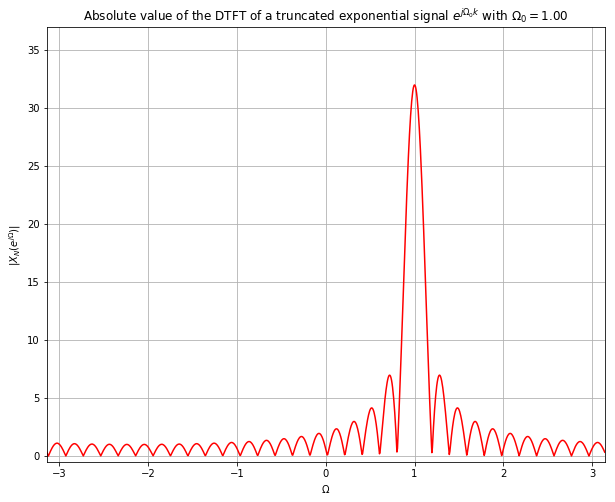

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Om0 = 1  # frequency of exponential signal
N = 32  # length of signal


# DTFT of finite length exponential signal (analytic)
Om = np.linspace(-np.pi, np.pi, num=1024)
XN = np.exp(-1j * (Om-Om0) * (N-1) / 2) * (np.sin(N * (Om-Om0) / 2)) / (np.sin((Om-Om0) / 2))

# plot spectrum
plt.figure(figsize = (10, 8))
plt.plot(Om, abs(XN), 'r')
plt.title(r'Absolute value of the DTFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X_N(e^{j \Omega})|$')
plt.axis([-np.pi, np.pi, -0.5, N+5])
plt.grid()


**Ejercicio**

* Cambie la frecuencia `Om0` de la señal y vuelva a ejecutar el ejemplo. ¿Cómo cambia el espectro de magnitud?
* Cambie la longitud `N` de la señal y vuelva a ejecutar el ejemplo. ¿Cómo cambia el espectro de magnitud?

Solución: El máximo del valor absoluto del espectro se encuentra en la frecuencia $ \ Omega_0 $. Debería quedar claro que el truncamiento de la señal exponencial conduce a una ampliación del espectro. Cuanto más corta es la señal, más ancho se vuelve el lóbulo principal.

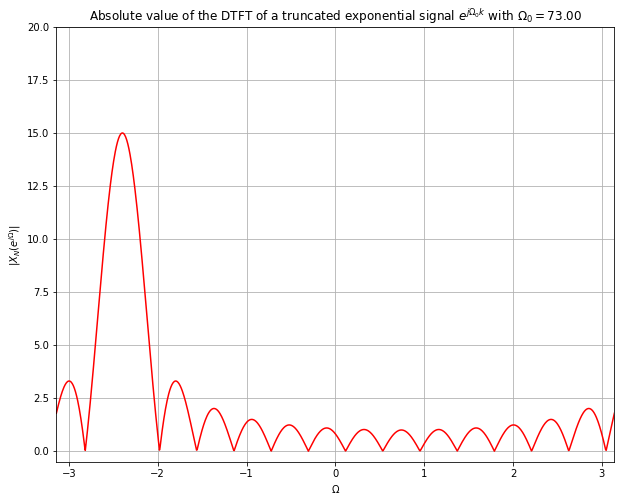

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Om0 = 73  # frequency of exponential signal
N = 15  # length of signal


# DTFT of finite length exponential signal (analytic)
Om = np.linspace(-np.pi, np.pi, num=1024)
XN = np.exp(-1j * (Om-Om0) * (N-1) / 2) * (np.sin(N * (Om-Om0) / 2)) / (np.sin((Om-Om0) / 2))

# plot spectrum
plt.figure(figsize = (10, 8))
plt.plot(Om, abs(XN), 'r')
plt.title(r'Absolute value of the DTFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X_N(e^{j \Omega})|$')
plt.axis([-np.pi, np.pi, -0.5, N+5])
plt.grid()

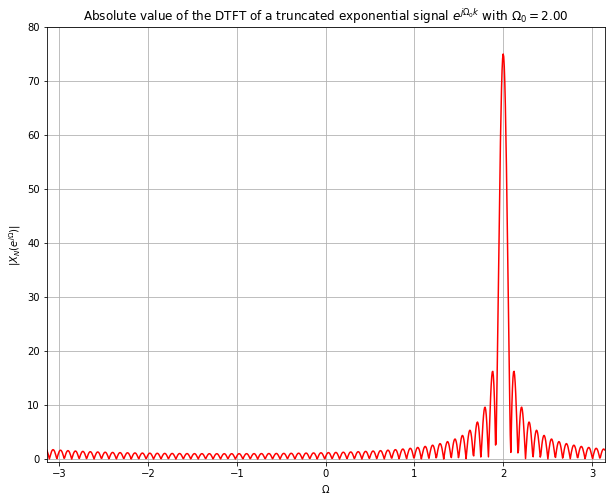

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Om0 = 2  # frequency of exponential signal
N = 75  # length of signal


# DTFT of finite length exponential signal (analytic)
Om = np.linspace(-np.pi, np.pi, num=1024)
XN = np.exp(-1j * (Om-Om0) * (N-1) / 2) * (np.sin(N * (Om-Om0) / 2)) / (np.sin((Om-Om0) / 2))

# plot spectrum
plt.figure(figsize = (10, 8))
plt.plot(Om, abs(XN), 'r')
plt.title(r'Absolute value of the DTFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X_N(e^{j \Omega})|$')
plt.axis([-np.pi, np.pi, -0.5, N+5])
plt.grid()

Podemos observar cómo los picos se mueven con Omega y con N se mueve el ancho del espectro

### El efecto de fuga de la transformada discreta de Fourier

El DFT se deriva del DTFT $ X_N (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $ de la señal truncada $ x_N [k] $ muestreando el DTFT equidistantemente en $ \ Omega = \ mu \ frac {2 \ pi} {N} $
\begin{equation}
X[\mu] = X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})\big\vert_{\Omega = \mu \frac{2 \pi}{N}}
\end{equation}

Para la DFT de la señal exponencial finalmente obtenemos

\begin{equation}
X[\mu] = \mathrm{e}^{\,\mathrm{j}\, (\Omega_0 - \mu \frac{2 \pi}{N}) \frac{N-1}{2}} \cdot \frac{\sin(\frac{N \,(\Omega_0 - \mu \frac{2 \pi}{N})}{2})}{\sin(\frac{\Omega_0 - \mu \frac{2 \pi}{N}}{2})}
\end{equation}

El muestreo de la DTFT se ilustra en el siguiente ejemplo. Tenga en cuenta que la frecuencia angular normalizada $ \ Omega_0 $ se ha expresado en términos de la periodicidad $ P $ de la señal exponencial $ \ Omega_0 = P \; \ frac {2 \ pi} {N} $.

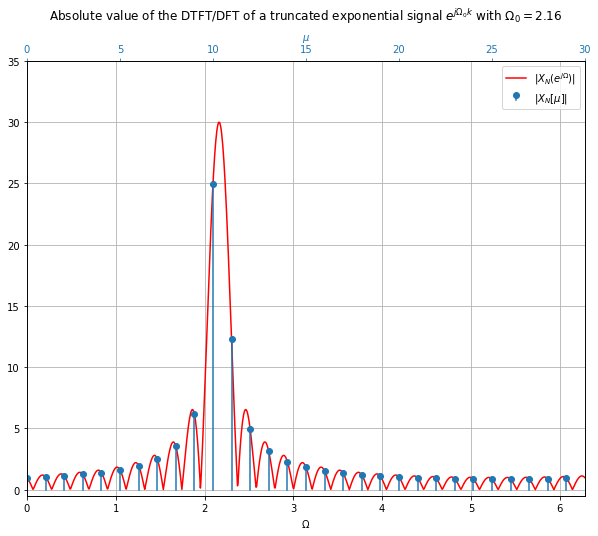

In [7]:
N = 30  # length of the signal
P = 10.33  # periodicity of the exponential signal
Om0 = P * (2*np.pi/N)  # frequency of exponential signal


# truncated exponential signal
k = np.arange(N)
x = np.exp(1j*Om0*k)

# DTFT of finite length exponential signal (analytic)
Om = np.linspace(0, 2*np.pi, num=1024)
Xw = np.exp(-1j*(Om-Om0)*(N-1)/2)*(np.sin(N*(Om-Om0)/2))/(np.sin((Om-Om0)/2))

# DFT of the exponential signal by FFT
X = np.fft.fft(x)
mu = np.arange(N) * 2*np.pi/N

# plot spectra
plt.figure(figsize = (10, 8))
ax1 = plt.gca()

plt.plot(Om, abs(Xw), 'r', label=r'$|X_N(e^{j \Omega})|$')
plt.stem(mu, abs(X), label=r'$|X_N[\mu]|$', basefmt=' ')
plt.ylim([-0.5, N+5]);
plt.title(r'Absolute value of the DTFT/DFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0, y=1.08)
plt.legend()

ax1.set_xlabel(r'$\Omega$')
ax1.set_xlim([Om[0], Om[-1]])
ax1.grid()

ax2 = ax1.twiny()
ax2.set_xlim([0, N])
ax2.set_xlabel(r'$\mu$', color='C0')
ax2.tick_params('x', colors='C0')

**Ejercicio**

* Cambie la periodicidad `P` de la señal exponencial y vuelva a ejecutar el ejemplo. ¿Qué sucede si la periodicidad es un número entero? ¿Por qué?
* ¿Cambiar la longitud `N` del DFT? ¿Cómo cambia el espectro?
* ¿Qué conclusiones se pueden sacar para el análisis de una sola señal exponencial por el DFT?

Solución: debe haber notado que para una señal exponencial cuya periodicidad es un entero $ P \ in \ mathbb {N} $, el DFT consiste en un pulso de Dirac discreto $ X [\ mu] = N \ cdot \ delta [\ mu - P] $. En este caso, los puntos de muestreo coinciden con el máximo del lóbulo principal o los ceros de la DTFT. Para $ P $ no enteros, por lo tanto, señales exponenciales no periódicas con respecto a la longitud de señal $ N $, el DFT tiene contribuciones adicionales. Cuanto más corta sea la longitud $ N $, más amplias se distribuirán estas contribuciones en el espectro. Este efecto manchado se conoce como * efecto de fuga * del DFT. Limita la resolución de frecuencia alcanzable de la DFT al analizar mezclas de señales que consisten en más de una señal exponencial o señales exponenciales bajo ruido aditivo. Esto se ilustra con los siguientes ejemplos numéricos.


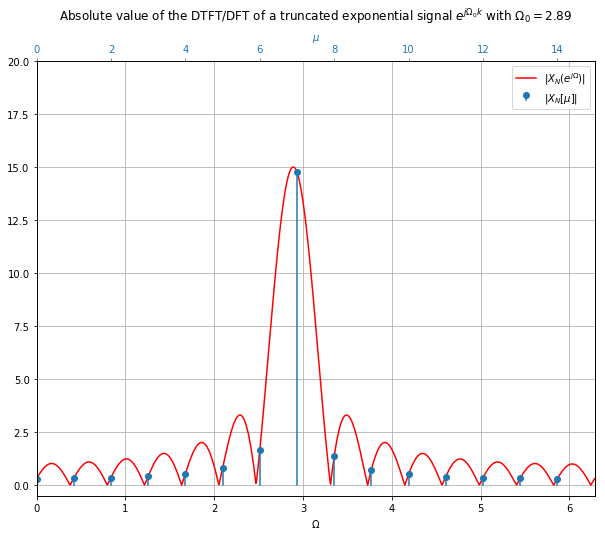

In [6]:
N = 15  # length of the signal
P = 6.9  # periodicity of the exponential signal
Om0 = P * (2*np.pi/N)  # frequency of exponential signal


# truncated exponential signal
k = np.arange(N)
x = np.exp(1j*Om0*k)

# DTFT of finite length exponential signal (analytic)
Om = np.linspace(0, 2*np.pi, num=1024)
Xw = np.exp(-1j*(Om-Om0)*(N-1)/2)*(np.sin(N*(Om-Om0)/2))/(np.sin((Om-Om0)/2))

# DFT of the exponential signal by FFT
X = np.fft.fft(x)
mu = np.arange(N) * 2*np.pi/N

# plot spectra
plt.figure(figsize = (10, 8))
ax1 = plt.gca()

plt.plot(Om, abs(Xw), 'r', label=r'$|X_N(e^{j \Omega})|$')
plt.stem(mu, abs(X), label=r'$|X_N[\mu]|$', basefmt=' ')
plt.ylim([-0.5, N+5]);
plt.title(r'Absolute value of the DTFT/DFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0, y=1.08)
plt.legend()

ax1.set_xlabel(r'$\Omega$')
ax1.set_xlim([Om[0], Om[-1]])
ax1.grid()

ax2 = ax1.twiny()
ax2.set_xlim([0, N])
ax2.set_xlabel(r'$\mu$', color='C0')
ax2.tick_params('x', colors='C0')

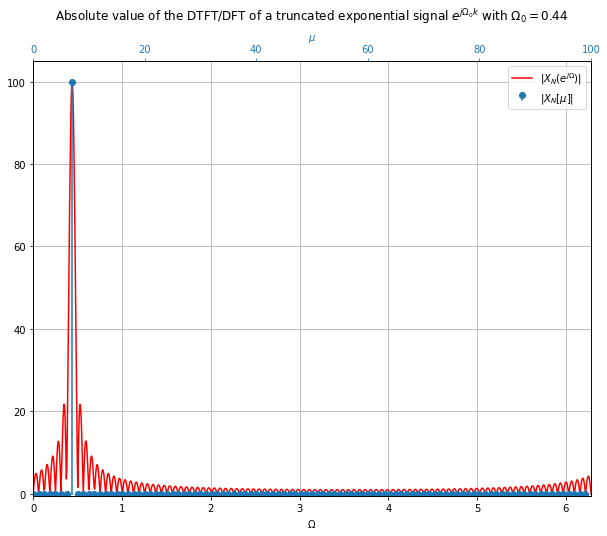

In [9]:
N= 100  # length of the signal
P = 7  # periodicity of the exponential signal
Om0 = P * (2*np.pi/N)  # frequency of exponential signal


# truncated exponential signal
k = np.arange(N)
x = np.exp(1j*Om0*k)

# DTFT of finite length exponential signal (analytic)
Om = np.linspace(0, 2*np.pi, num=1024)
Xw = np.exp(-1j*(Om-Om0)*(N-1)/2)*(np.sin(N*(Om-Om0)/2))/(np.sin((Om-Om0)/2))

# DFT of the exponential signal by FFT
X = np.fft.fft(x)
mu = np.arange(N) * 2*np.pi/N

# plot spectra
plt.figure(figsize = (10, 8))
ax1 = plt.gca()

plt.plot(Om, abs(Xw), 'r', label=r'$|X_N(e^{j \Omega})|$')
plt.stem(mu, abs(X), label=r'$|X_N[\mu]|$', basefmt=' ')
plt.ylim([-0.5, N+5]);
plt.title(r'Absolute value of the DTFT/DFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0, y=1.08)
plt.legend()

ax1.set_xlabel(r'$\Omega$')
ax1.set_xlim([Om[0], Om[-1]])
ax1.grid()

ax2 = ax1.twiny()
ax2.set_xlim([0, N])
ax2.set_xlabel(r'$\mu$', color='C0')
ax2.tick_params('x', colors='C0')

Y a números enteros más exactas son las gráficas 

Podemos ver que a números no enteros está más lejos la gráfica azul de la roja


### Análisis de mezclas de señales mediante la transformada discreta de Fourier

Para analizar las implicaciones del efecto de fuga al analizar mezclas de señales, se considera la superposición de dos señales exponenciales con diferentes amplitudes y frecuencias.

\begin{equation}
x_N[k] = A_1 \cdot e^{\mathrm{j} \Omega_1 k} + A_2 \cdot e^{\mathrm{j} \Omega_2 k}
\end{equation}

donde $ A_1, A_2 \ in \ mathbb {R} $. Por conveniencia, se define una función que calcula y traza el espectro de magnitud de $ x_N [k] $.

In [8]:
def dft_signal_mixture(N, A1, P1, A2, P2):
    # N: length of signal/DFT
    # A1, P1, A2, P2: amplitude and periodicity of 1st/2nd complex exponential
    
    # generate the signal mixture
    Om0_1 = P1 * (2*np.pi/N)  # frequency of 1st exponential signal
    Om0_2 = P2 * (2*np.pi/N)  # frequency of 2nd exponential signal
    k = np.arange(N)
    x = A1 * np.exp(1j*Om0_1*k) + A2 * np.exp(1j*Om0_2*k)

    # DFT of the signal mixture
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot spectrum
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X), basefmt=' ')
    plt.title(r'Absolute value of the DFT of a signal mixture')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, N+5]);
    plt.grid()

Consideremos primero el caso de que las frecuencias de los dos exponenciales están bastante separadas en términos de frecuencia angular normalizada

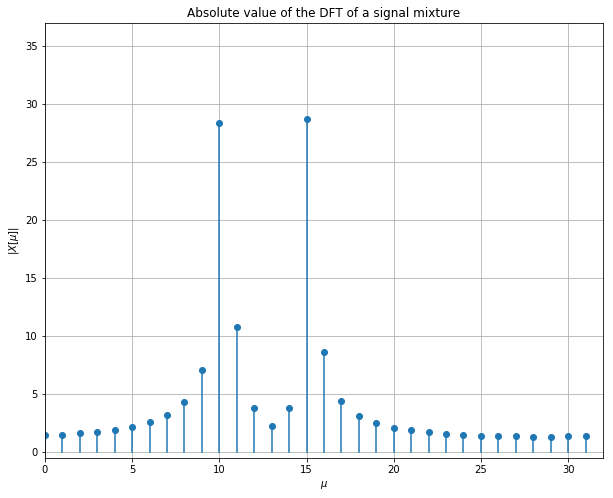

In [9]:
dft_signal_mixture(32, 1, 10.3, 1, 15.2)

Investigando el espectro de magnitud se podría concluir que la señal consta de dos contribuciones principales en las frecuencias $ \ mu_1 = 10 $ y $ \ mu_2 = 15 $. Ahora echemos un vistazo a una situación en la que las frecuencias están más juntas

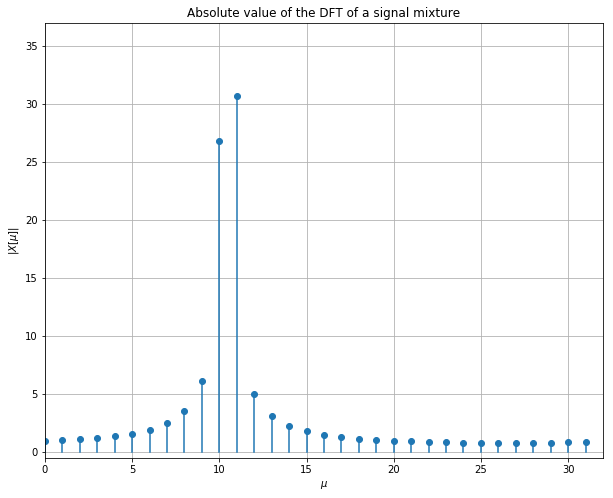

In [10]:
dft_signal_mixture(32, 1, 10.3, 1, 10.9)


A partir de la inspección visual del espectro, no está claro si la mezcla consta de una o dos señales exponenciales. Hasta ahora, los niveles de ambas señales donde se eligieron son iguales.

Consideremos el caso en que la segunda señal tiene un nivel mucho más bajo que la primera. Las frecuencias se han elegido iguales al primer ejemplo.

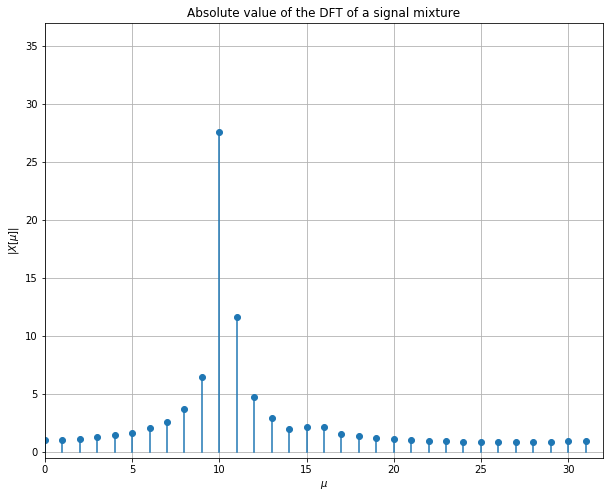

In [11]:
dft_signal_mixture(32, 1, 10.3, 0.1, 15.2)

Ahora la contribución del segundo exponencial está casi oculta en el espectro extendido del primer exponencial. A partir de estos ejemplos, debería quedar claro que el efecto de fuga limita la resolución espectral del DFT.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.